<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/ml/N500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

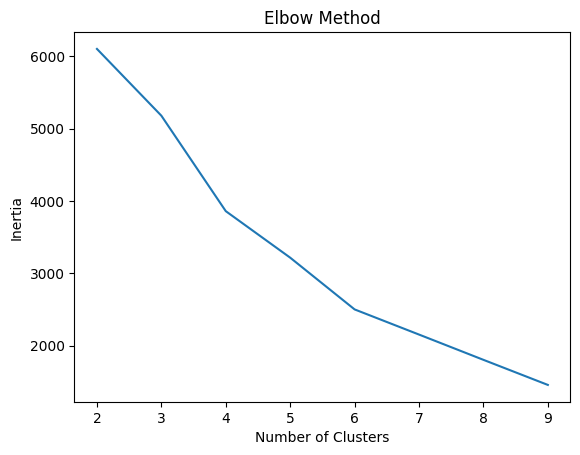

Cluster 0:
 feat_P/E                 27.700000
feat_P/B                  3.290000
feat_Div Yield %          1.150000
feat_dist_from_ma_150     0.078420
feat_dist_from_ma_200     0.100251
dtype: float64
Cluster 1:
 feat_P/E                 22.240000
feat_P/B                  4.060000
feat_Div Yield %          1.300000
feat_dist_from_ma_150     0.007452
feat_dist_from_ma_200     0.018945
dtype: float64
Cluster 2:
 feat_P/E                 22.920000
feat_P/B                  2.480000
feat_Div Yield %          1.590000
feat_dist_from_ma_150    -0.170484
feat_dist_from_ma_200    -0.170277
dtype: float64
Cluster 3:
 feat_P/E                 24.625000
feat_P/B                  2.910000
feat_Div Yield %          1.370000
feat_dist_from_ma_150    -0.017489
feat_dist_from_ma_200    -0.013177
dtype: float64
Cluster 4:
 feat_P/E                 28.720000
feat_P/B                  4.230000
feat_Div Yield %          1.050000
feat_dist_from_ma_150     0.102770
feat_dist_from_ma_200     0.153076
dtype

<ipython-input-17-f66b7b886340>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your 10-year Nifty data (assuming a CSV format)
data_r = pd.read_csv('/content/n500data.csv', index_col='Date', parse_dates=True)
data_r.reset_index(inplace=True)

# Feature engineering (optional)
for m in [150,200]:
    data_r[f'feat_dist_from_ma_{m}'] = data_r['Close']/data_r['Close'].rolling(m).mean()-1
'''
# Distance from n day max/min
for m in [50, 200]:
    data_r[f'feat_dist_from_max_{m}'] = data_r['Close']/data_r['High'].rolling(m).max()-1
    data_r[f'feat_dist_from_min_{m}'] = data_r['Close']/data_r['Low'].rolling(m).min()-1

# Price distance
for m in [20,50]:
    data_r[f'feat_price_dist_{m}'] = data_r['Close']/data_r['Close'].shift(m)-1
'''
data=data_r[(data_r['Date'] >= '2015-01-01') & (data_r['Date'] < '2022-11-30')]
# Select features and scale the data
features = [col for col in data_r.columns if 'feat' in col]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Determine the number of clusters (Elbow Method)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init='auto')
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 10), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal_k based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=7, random_state=0, n_init='auto')
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

# Analyze and interpret clusters
for i in range(7):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].median())


In [18]:
'''
import seaborn as sns

sns.pairplot(data[features + ['Cluster']], diag_kind='kde', kind='scatter',
             markers='+', hue='Cluster', palette='viridis')
plt.show()
'''

"\nimport seaborn as sns\n\nsns.pairplot(data[features + ['Cluster']], diag_kind='kde', kind='scatter',\n             markers='+', hue='Cluster', palette='viridis')\nplt.show()\n"

In [19]:
# Analyze and interpret clusters
for i in range(7):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].median())


Cluster 0:
 feat_P/E                 27.700000
feat_P/B                  3.290000
feat_Div Yield %          1.150000
feat_dist_from_ma_150     0.078420
feat_dist_from_ma_200     0.100251
dtype: float64
Cluster 1:
 feat_P/E                 22.240000
feat_P/B                  4.060000
feat_Div Yield %          1.300000
feat_dist_from_ma_150     0.007452
feat_dist_from_ma_200     0.018945
dtype: float64
Cluster 2:
 feat_P/E                 22.920000
feat_P/B                  2.480000
feat_Div Yield %          1.590000
feat_dist_from_ma_150    -0.170484
feat_dist_from_ma_200    -0.170277
dtype: float64
Cluster 3:
 feat_P/E                 24.625000
feat_P/B                  2.910000
feat_Div Yield %          1.370000
feat_dist_from_ma_150    -0.017489
feat_dist_from_ma_200    -0.013177
dtype: float64
Cluster 4:
 feat_P/E                 28.720000
feat_P/B                  4.230000
feat_Div Yield %          1.050000
feat_dist_from_ma_150     0.102770
feat_dist_from_ma_200     0.153076
dtype

In [20]:
data_s=data

In [21]:
data_s.reset_index(inplace=True)

In [22]:
import plotly.express as px

fig = px.scatter(
    data_s,
    x='Date',
    y='Close',
    color='Cluster',
    color_continuous_scale='rdylgn',
    title='Cluster Analysis - Training',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()


In [23]:
df_test = data_r[data_r['Date'] >= '2022-12-01'].reset_index(drop=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_test[features])

df_test['cluster'] = kmeans.predict(scaled_data)

fig = px.scatter(
    df_test,
    x='Date',
    y='Close',
    color='cluster',
    color_continuous_scale='viridis',
    title='Cluster Analysis - Testing-- LOOK FOR BOTTOMS FORMING',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()

***Cluster 0: Moderate Valuations, Potential Uptrend***

Thesis: Companies with reasonable growth expectations and a mild upward trend in price. Look for businesses with:
Stable track records of earnings growth.
Decent dividend yields offering some income.
A favorable position within their industry.


***Cluster 1: Balanced Valuation, Close to Moving Averages***

Thesis: A mix of growth and value potential, trading relatively close to their recent averages. Focus on companies that:
Have moderate growth expectations but not excessively high valuations.
Offer decent dividend yields for income potential.
Could see short-term price fluctuations, offering potential entry points for patient investors.


***Cluster 2: Undervalued or Out-of-Favor***

Thesis: Potentially undervalued companies that might be temporarily out of favor with the market. Seek out companies with:
Low P/B ratios relative to their sector or historical averages.
Sound fundamentals but facing short-term headwinds.
A catalyst that could cause the market to re-evaluate their worth.


***Cluster 3: Moderate Valuations, Possible Short-Term Dip***

Thesis: Companies with reasonable valuations but experiencing a slight dip in price, potentially offering a buying opportunity. Analyze companies that:
Have decent growth prospects but may be experiencing temporary setbacks.
Have strong fundamentals that support their long-term potential.
Use technical analysis tools to confirm a potential trend reversal.



***Cluster 4: Possible Growth or Overvaluation***

Thesis: Companies commanding premium valuations, possibly due to high growth expectations. Proceed with caution and focus on businesses with:
Exceptional growth track records that justify the high P/E.
Strong competitive advantages and positive future outlooks.
Be wary of overvaluation risk if growth expectations aren't met.



***Cluster 5: Highest Growth Expectations or Overvaluation Risk***

Thesis: Highest growth potential, but also the highest potential for overvaluation. Exercise extreme caution and investigate companies with:
Disruptive potential or leadership within high-growth industries.
Strong fundamentals to support the extremely high valuation.
Be prepared for potential volatility and significant corrections if the market's expectations change.



***Cluster 6: Moderate Growth Potential, Near Moving Averages***

Thesis: Companies with reasonable growth expectations trading slightly above their recent averages. Look for:
Businesses with steady earnings growth history.
Potential for modest price appreciation and dividend income.

In [24]:
# Analyze and interpret clusters
for i in range(7):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].mean())


Cluster 0:
 feat_P/E                 28.019825
feat_P/B                  3.238254
feat_Div Yield %          1.101247
feat_dist_from_ma_150     0.079595
feat_dist_from_ma_200     0.099448
dtype: float64
Cluster 1:
 feat_P/E                 22.329071
feat_P/B                  4.066062
feat_Div Yield %          1.283496
feat_dist_from_ma_150     0.000690
feat_dist_from_ma_200     0.005839
dtype: float64
Cluster 2:
 feat_P/E                 22.590556
feat_P/B                  2.455556
feat_Div Yield %          1.612917
feat_dist_from_ma_150    -0.171683
feat_dist_from_ma_200    -0.173298
dtype: float64
Cluster 3:
 feat_P/E                 25.307423
feat_P/B                  2.925903
feat_Div Yield %          1.369581
feat_dist_from_ma_150    -0.016293
feat_dist_from_ma_200    -0.014027
dtype: float64
Cluster 4:
 feat_P/E                 29.487354
feat_P/B                  4.215026
feat_Div Yield %          1.039471
feat_dist_from_ma_150     0.104059
feat_dist_from_ma_200     0.149170
dtype

In [25]:
df_test['cluster'].tail(1)

316    4
Name: cluster, dtype: int32

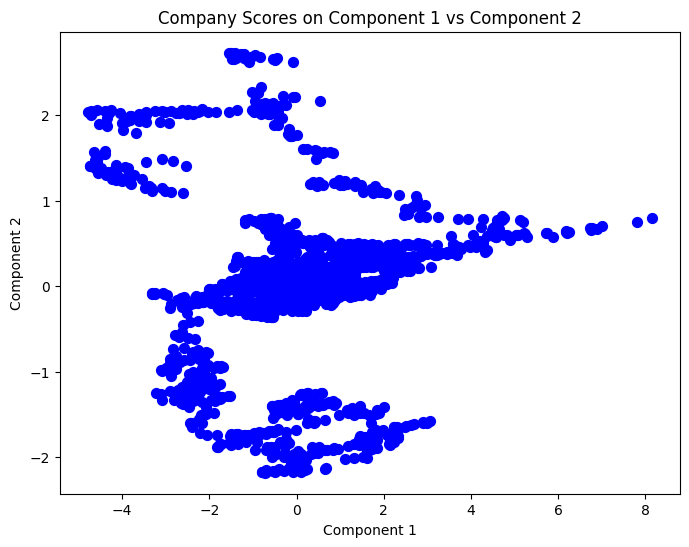

In [26]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data[features]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create PCA object with 3 components
pca = PCA(n_components=3)

# Fit and transform the data
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame to hold results
df_pca = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2', 'PC3'])

# Scatter plot of PC1 vs PC2
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Company Scores on Component 1 vs Component 2')
plt.show()


In [27]:
# View the 'loadings' to understand how original ratios contribute to components
print(pca.components_)




[[-0.38478733 -0.36758175  0.42050439 -0.51203223 -0.52708768]
 [ 0.62304079 -0.68276179  0.31961015  0.18474661  0.09682226]
 [-0.30506199  0.234874    0.78021434  0.38697362  0.3054315 ]]


In [28]:
# Calculate explained variance to see importance of each component
print(pca.explained_variance_ratio_)

[0.65137844 0.17976467 0.09731264]


<ipython-input-29-9b46738d0002>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



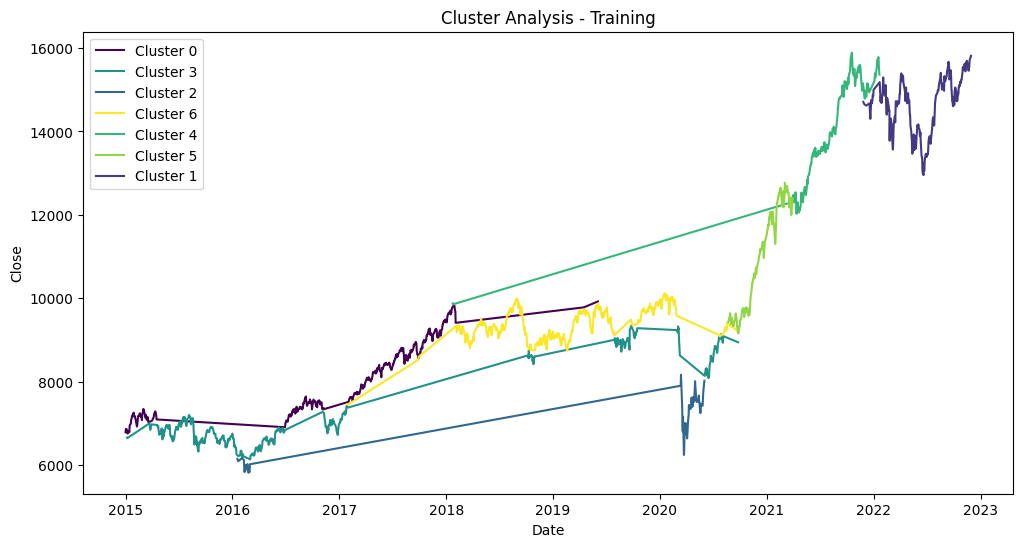

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm  # For the 'viridis' colormap

# ... (Assume your data_s DataFrame exists with 'Date', 'Close', 'Cluster')

# Extract unique clusters in order for sequential coloring
unique_clusters = data_s['Cluster'].unique()

# Get 'viridis' colormap and normalize
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colors from colormap
for i, cluster in enumerate(unique_clusters):
    cluster_data = data_s[data_s['Cluster'] == cluster]
    ax.plot(cluster_data['Date'], cluster_data['Close'],
               c=cmap(normalize(cluster)),
               label=f'Cluster {cluster}')

# Labels and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Cluster Analysis - Training')
ax.legend()
plt.show()


<ipython-input-30-8c9dfb6599fe>:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



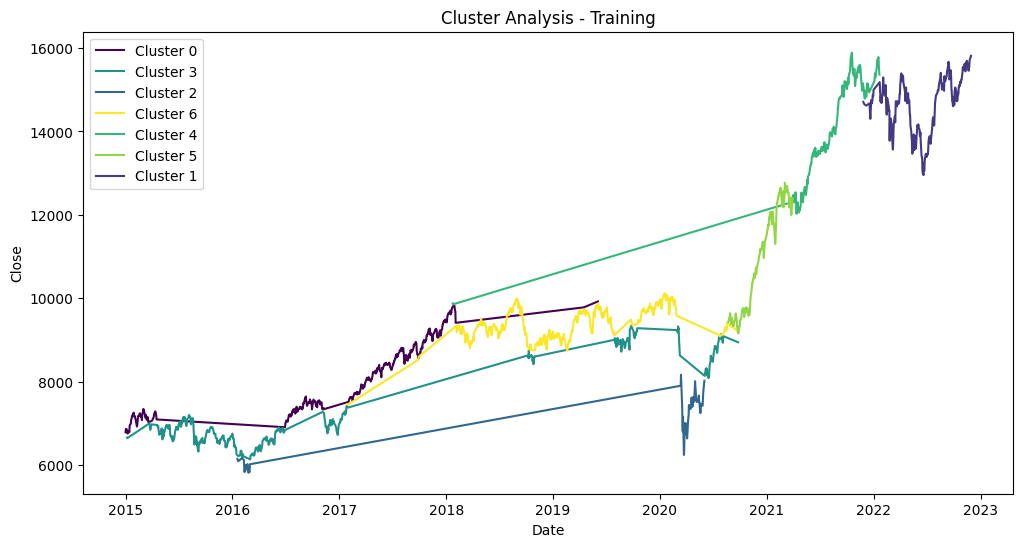

In [30]:
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

fig, ax = plt.subplots(figsize=(12, 6))
# Line plot for each cluster
for i, cluster in enumerate(unique_clusters):
   cluster_data = data_s[data_s['Cluster'] == cluster]
   ax.plot(cluster_data['Date'], cluster_data['Close'],
           c=cmap(normalize(cluster)),
           label=f'Cluster {cluster}')
# Labels and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Cluster Analysis - Training')
ax.legend()
plt.show()